In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from numpy import arange
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#loading the data
df = pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
#check first 10 rows
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [3]:
#check bottom 5 rows
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [4]:
#check number of columns and rows
df.shape

(301, 9)

In [5]:
#lets get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#check for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#lets check some statistics
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#lets check for datatypes
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [9]:
#lets get the categorical variables
cat_vars = [var for var in df.columns if df[var].dtypes=='O']
cat_vars

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [10]:
#lets get the numerical variables
num_vars = [var for var in df.columns if df[var].dtypes!='O']
num_vars

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [11]:
#length of numerical and categoical variables
print(len(num_vars))
print(len(cat_vars))

5
4


In [12]:
#lets  check unique labels in categorical variables
print('unique cars:',df['Car_Name'].unique())
print()
print('unique fuel type:',df['Fuel_Type'].unique())
print()
print('seller type:',df['Seller_Type'].unique())
print()
print('mode of transmission:',df['Transmission'].unique())

unique cars: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220'

In [13]:
#lets count the various car names
df['Car_Name'].value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Dream Yuga       1
etios gd               1
TVS Wego               1
Hero  Ignitor Disc     1
Bajaj Dominar 400      1
Name: Car_Name, Length: 98, dtype: int64

In [14]:
#lets create mean car price per car name
def mean_car_price_per_carname(df, vr):

    total_data = len(df)

   
    df_t = pd.Series(df[vr].value_counts() / total_data).reset_index()
    df_t.columns = [vr, 'per_carnames']

   
    df_t = df_t.merge(df.groupby([vr])['Selling_Price'].mean().reset_index(),
                            on=vr,
                            how='left')

    return df_t

In [15]:
df_t = mean_car_price_per_carname(df, 'Car_Name')
df_t.head(20)

,Car_Name,per_carnames,Selling_Price
0,city,0.086379,7.419231
1,corolla altis,0.053156,7.183125
2,verna,0.046512,6.107857
3,fortuner,0.036545,18.685455
4,brio,0.033223,4.745000
5,i20,0.029900,4.766667
6,ciaz,0.029900,7.472222
7,innova,0.029900,12.777778
8,grand i10,0.026578,4.943750
9,amaze,0.023256,4.221429


In [16]:
#let visualize it and see if the car names have impact on the selling price
def bar_plot(df,var):
    fig, ax = plt.subplots(figsize=(30, 13))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["per_carnames"], color='lightblue')
    ax2.plot(df.index, df["Selling_Price"], color='red')
    ax.axhline(y=0.04, color='red')
    ax.set_ylabel('percentage of car names ')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average car price per name')
    plt.show()

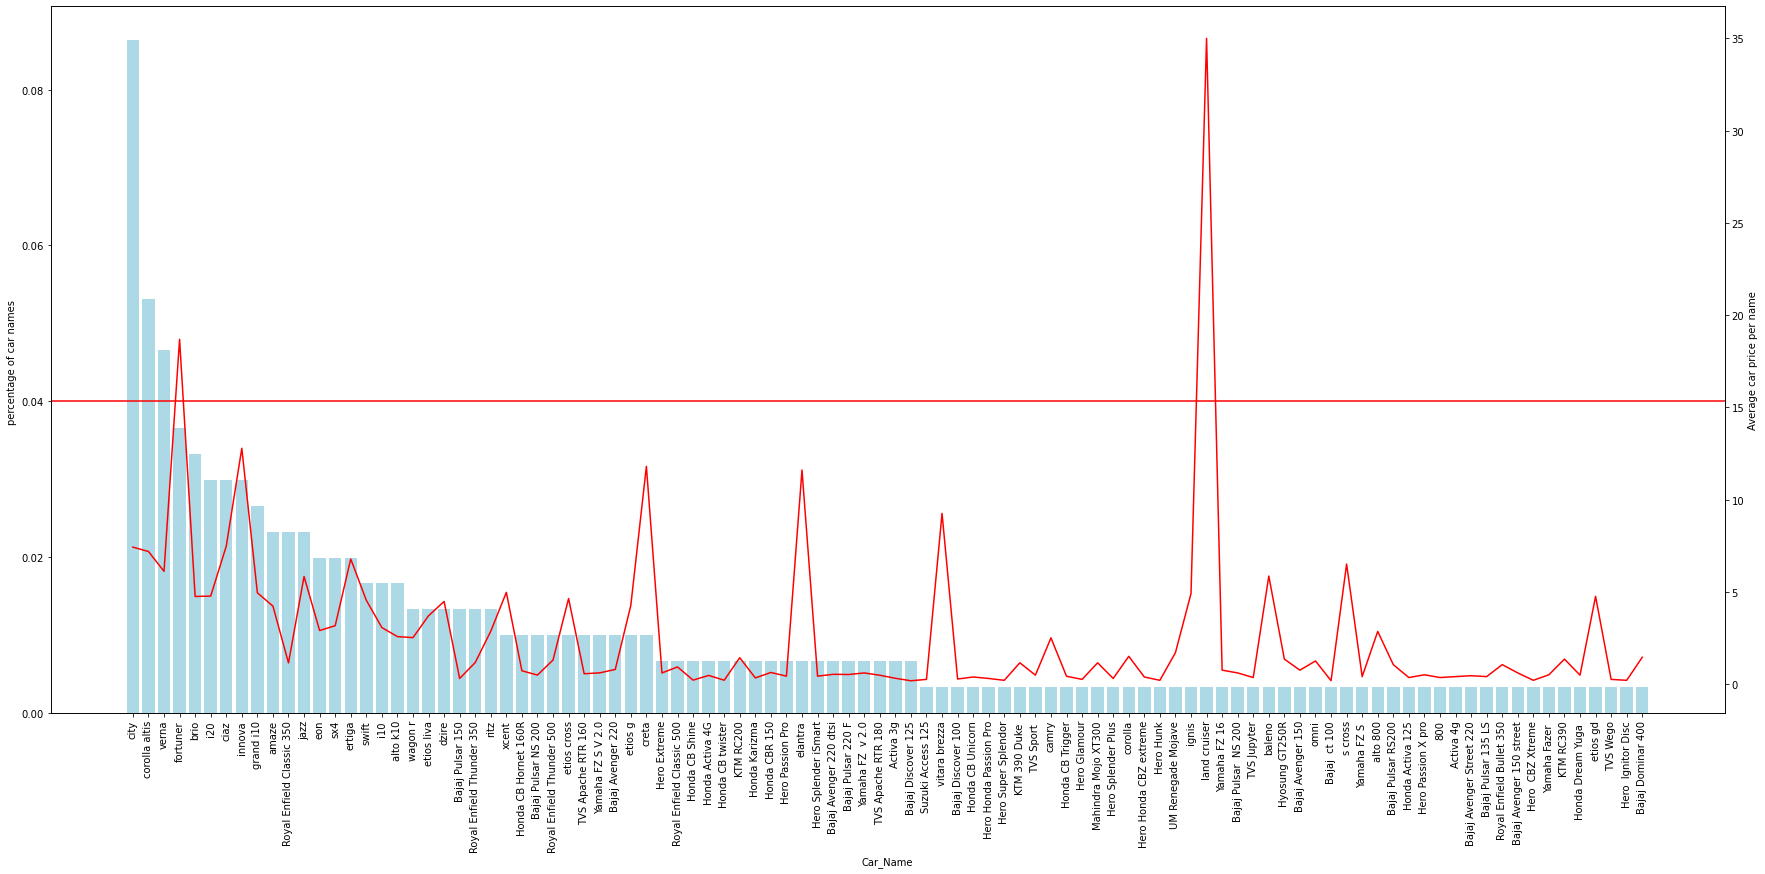

In [17]:
bar_plot(df_t,'Car_Name')#From the graph below the car names tend to have impact

In [18]:
#lets group the car names into rare cars and popular ones
def popular_car_grouping(df,vr):
    total_data = len(df)
    df_t = pd.Series(df[vr].value_counts()/total_data)
    group_car = {
        c:('rare_cars' if c not in df_t[df_t>=0.023256].index  else 'popular_cars')
        for c in df_t.index
    }
    dt = df[vr].map(group_car)
    return dt

In [19]:
df['car_popularity']=popular_car_grouping(df,'Car_Name')

In [20]:
df['car_popularity'].unique()

array(['rare_cars', 'popular_cars'], dtype=object)

In [21]:
#creating number of years from when the car was made
df['car_num_yrs'] = 2021-df['Year']

In [22]:
#to check if the new faetures are there
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_popularity,car_num_yrs
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,rare_cars,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,rare_cars,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,popular_cars,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,rare_cars,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,rare_cars,7


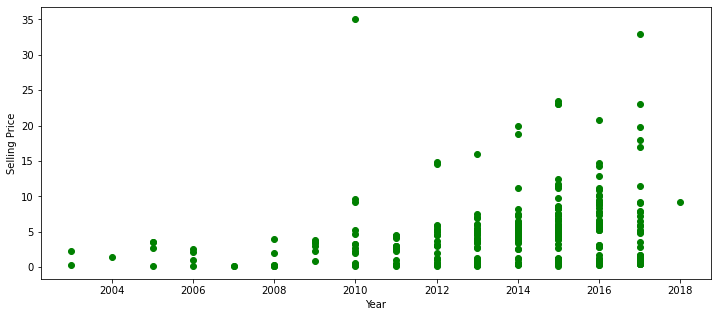

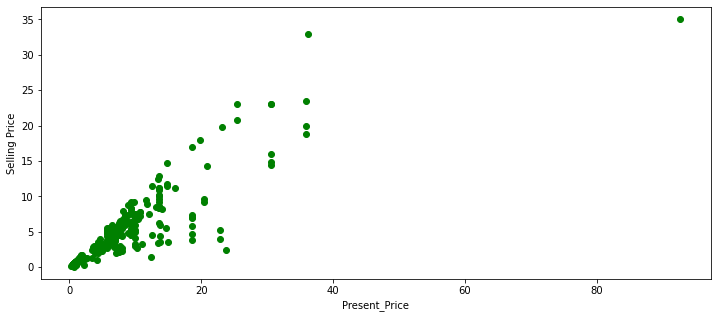

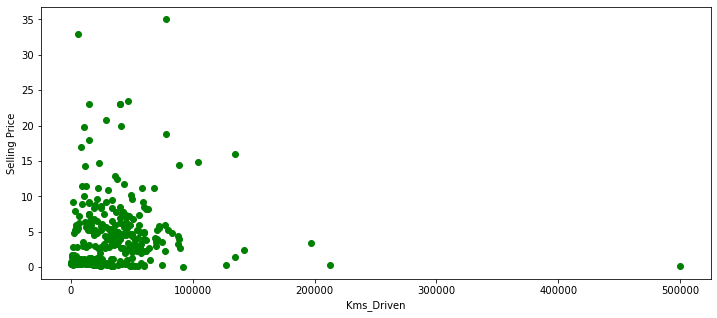

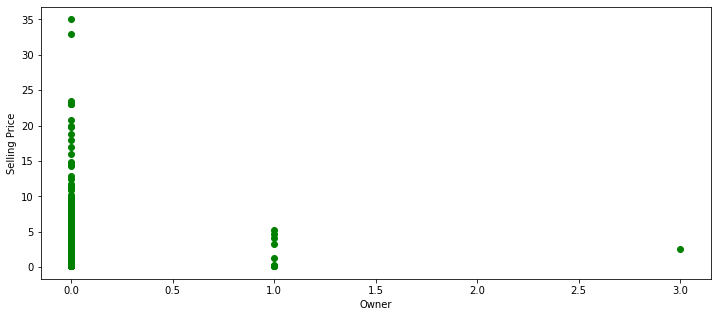

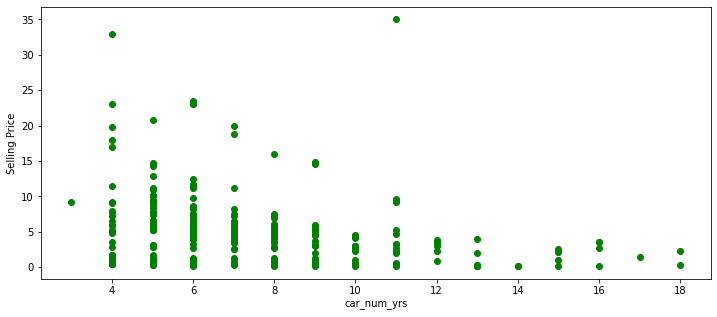

In [23]:
#LETS CHECK THE RELATIONSHIP BETWEEN VARIOUS VARIABLES AND THE TARGET
#for numerical variables
num_vars = [var for var in df.columns if df[var].dtypes!='O' and var!='Selling_Price']
for v in num_vars:
    plt.figure(figsize=(12,5))
    plt.plot(df[v],df["Selling_Price"],'o',color='green')
    plt.ylabel('Selling Price')
    plt.xlabel(v)

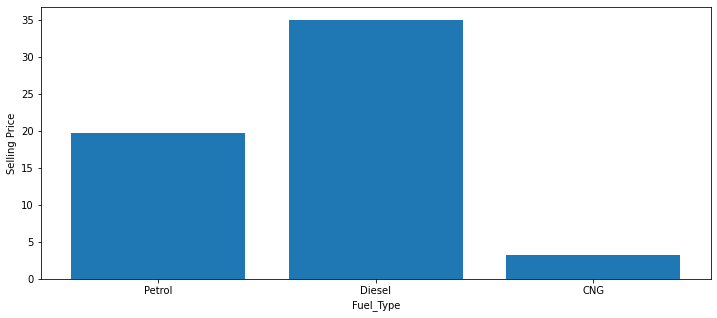

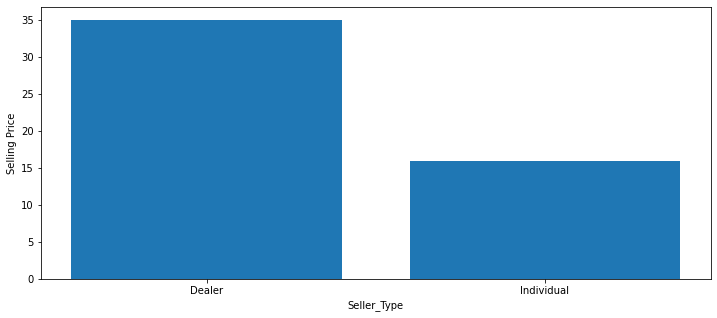

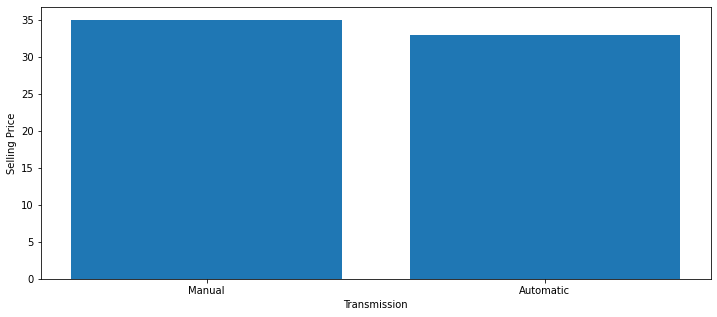

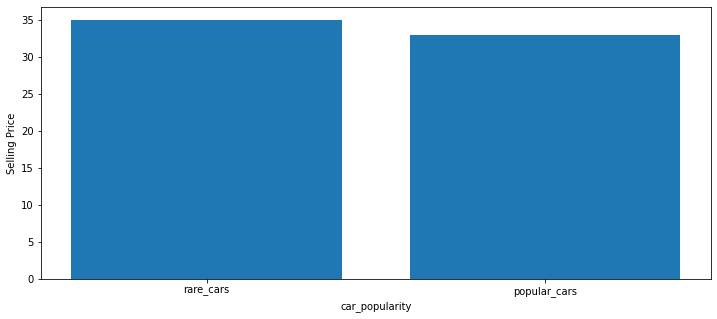

In [24]:
cat_vars = [var for var in df.columns if df[var].dtypes=='O' and var!="Car_Name"]
for c in cat_vars:
    plt.figure(figsize=(12,5))
    plt.bar(df[c],df['Selling_Price'])
    plt.xlabel(c)
    plt.ylabel('Selling Price')

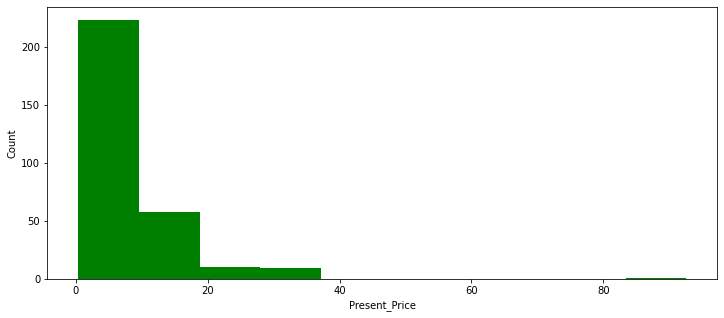

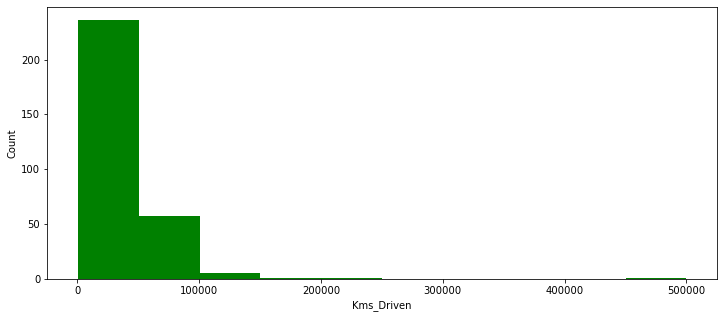

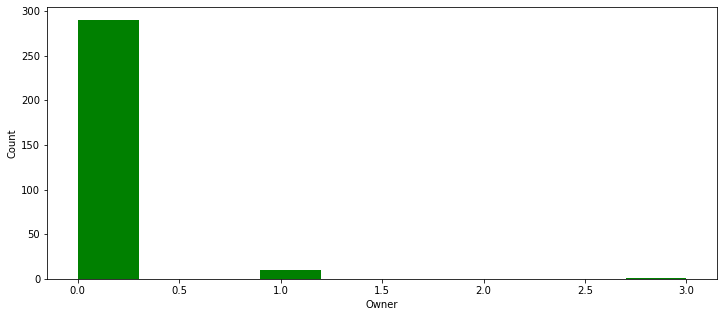

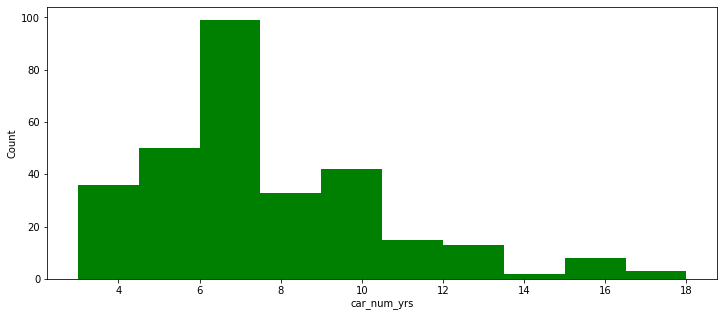

In [25]:
#LETS CHECK FOR DISTRIBUTION OF VARIABLES
#For numerical variables
num_vars = [var for var in df.columns if df[var].dtypes!='O' and var!='Selling_Price']
for v in num_vars:
    if v!='Year':
        plt.figure(figsize=(12,5))
        plt.hist(df[v],color='green')
        plt.xlabel(v)
        plt.ylabel('Count')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


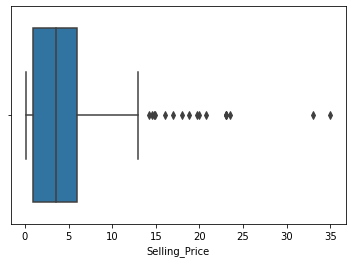

In [26]:
#FEATURE ENGINEERING
#Handling outlier
sns.boxplot(df['Selling_Price'])
plt.show()

In [27]:
#investigate the quantiles and mean
print('The 95th quantile is:',df['Selling_Price'].quantile(0.95))
print('The 5th quantile is:',df['Selling_Price'].quantile(0.05))
print('The median is:',df['Selling_Price'].quantile(0.50))
print('The 75th quantile is:',df['Selling_Price'].quantile(0.75))
print('The mean is:',df['Selling_Price'].mean())

The 95th quantile is: 14.5
The 5th quantile is: 0.25
The median is: 3.6
The 75th quantile is: 6.0
The mean is: 4.661295681063127


In [28]:
def outlier_boundary(vr):
    oulier_lower=vr.quantile(0.02)
    oulier_upper=vr.quantile(0.95)
    return oulier_lower,oulier_upper

In [29]:
#checking the top and bottom baundries
last_p,top_p=outlier_boundary(df['Selling_Price'])
last_p,top_p

(0.2, 14.5)

In [30]:
#capping outlier in the target
df['Selling_Price']=np.where(df['Selling_Price']>top_p,top_p,
                    np.where(df['Selling_Price']<last_p,last_p,df['Selling_Price']))

In [31]:
last_p,top_p=outlier_boundary(df['Present_Price'])
last_p,top_p

(0.51, 22.78)

In [32]:
#capping outlier in the presentprice
df['Present_Price']=np.where(df['Present_Price']>top_p,top_p,
                    np.where(df['Present_Price']<last_p,last_p,df['Present_Price']))

In [33]:
#Handling Rare Labels
#handling rare category that may be present in training but not in testing set(CNG is present only twice in the dataset)
df['Fuel_Type'] = df['Fuel_Type'].replace('CNG','Diesel')

In [34]:
df_t = df[['Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'car_popularity','car_num_yrs','Selling_Price']]

In [35]:
#Categorical encoding
df_t = pd.get_dummies(df_t,drop_first=True) 

In [36]:
df_t

,Present_Price,Kms_Driven,Owner,car_num_yrs,Selling_Price,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,car_popularity_rare_cars
0,5.59,27000,0,7,3.35,1,0,1,1
1,9.54,43000,0,8,4.75,0,0,1,1
2,9.85,6900,0,4,7.25,1,0,1,0
3,4.15,5200,0,10,2.85,1,0,1,1
4,6.87,42450,0,7,4.60,0,0,1,1
...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,9.50,0,0,1,0
297,5.90,60000,0,6,4.00,1,0,1,0
298,11.00,87934,0,12,3.35,1,0,1,0
299,12.50,9000,0,4,11.50,0,0,1,0


<AxesSubplot:>

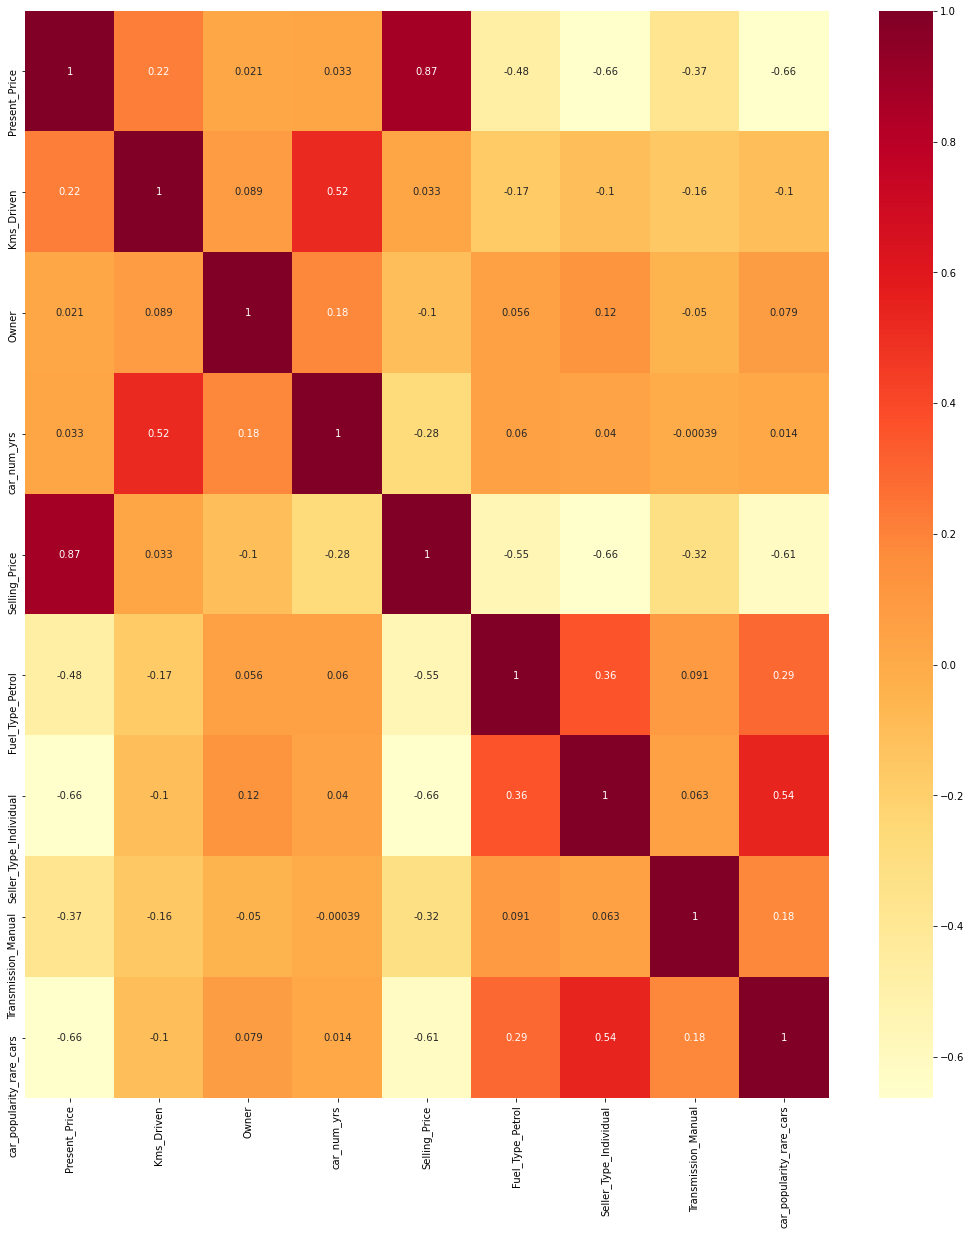

In [37]:
#FEATURE SELECTION
#using correlation matrix
mat_cor = df_t.corr()
high_cor_vr = mat_cor.index
plt.figure(figsize=(18,20))
sns.heatmap(df_t[high_cor_vr].corr(),annot=True,cmap='YlOrRd')

In [38]:
#creating x and y 
x = df_t[['Present_Price','car_num_yrs','Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual','car_popularity_rare_cars']]
y = df_t['Selling_Price']

In [39]:
#splitting data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
#Feature Scaling
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [41]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
#MODEL TRAINING
#LASSO REGRESSION
reg = Lasso()
#model evaluation
cv = RepeatedKFold(n_splits=11, n_repeats=4, random_state=20)
#Gridsearch for model tuning
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
find_params = GridSearchCV(reg, grid, cv=cv, n_jobs=1)
#fit it to our data for it the learn the best parameters 
lasso_model = find_params.fit(x_train_scaled,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193.77761111461047, tolerance: 0.34598908165137615
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/si

In [43]:
#making predictions
lasso_pred =lasso_model.predict(x_test_scaled)

In [44]:
print('accuracy of lasso_regression:',lasso_model.score(x_test_scaled,y_test))

accuracy of lasso_regression: 0.8361624642461277


In [45]:
#KNN REGRESSION
#knn instance
knn_set = KNeighborsRegressor()

In [46]:
#hyperparameters
leaf_size = list(range(1,11))
n_neighbors = list(range(1,11))
p=[1,2]
#setting hyperparameters as dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Use GridSearch
knn_grid = GridSearchCV(knn_set, hyperparameters, cv=10)

In [47]:
#Fit the model
knn_reg = knn_grid.fit(x_train_scaled,y_train)
pred_knn=knn_reg.predict(x_test_scaled)

In [48]:
print('knn regression accuracy is:',knn_reg.score(x_test_scaled,y_test)) 

knn regression accuracy is: 0.9249083856884558


In [49]:
#RANDOM FOREST REGRESSION
#create instance of random forest
rf_reg=RandomForestRegressor()
#Hyperparameters:
# Number of trees to try 
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200,1300]
#max features to consider 
max_features = ['auto', 'sqrt']
# Maximum number of depth in trees
max_depth = [5, 10, 15, 20, 25, 30,35]
#min samples for splitting nodes
min_samples_split = [5, 10, 15, 20,25,60,100]
# Min samples for each leaf 
min_samples_leaf = [1, 2, 3,5, 12]

In [50]:
#random_grid for hyperparameter tuning
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [51]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35],
 'min_samples_split': [5, 10, 15, 20, 25, 60, 100],
 'min_samples_leaf': [1, 2, 3, 5, 12]}

In [52]:
#search for optimal parameters using cv=6
rf_regr = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, n_iter = 12, cv = 6, verbose=2, random_state=4, n_jobs = 1)


In [53]:
#fit the train data
rf_regr.fit(x_train_scaled,y_train)

Fitting 6 folds for each of 12 candidates, totalling 72 fits
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=600, min_samples_split=10

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  1.3min finished


RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(), n_iter=12, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30,
                                                      35],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 12],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              60, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300]},
                   random_state=4, verbose=2)

In [54]:
#predict the selling price in the test data
pred=rf_regr.predict(x_test_scaled)

In [55]:
#check how well model is performing
print('accuracy of random forest regressor:',rf_regr.score(x_test_scaled,y_test))

accuracy of random forest regressor: 0.933884139150114


In [56]:
#ENSEMBLE:VOTINGREGRESSOR
vote_reg = VotingRegressor([('lasso', lasso_model), ('knn', knn_reg),('rf',rf_regr)]) 
vote_reg.fit(x_train_scaled,y_train)
pred = vote_reg.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193.77761111461047, tolerance: 0.34598908165137615
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/si

Fitting 6 folds for each of 12 candidates, totalling 72 fits
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=600, min_samples_split=10

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  1.3min finished


In [57]:
#check how well model is performing
print('accuracy of voting regressor:',vote_reg.score(x_test_scaled,y_test))

accuracy of voting regressor: 0.9348646030517405


In [58]:
print('accuracy of voting regressor:',vote_reg.score(x_test_scaled,y_test))
print('accuracy of random forest regressor:',rf_regr.score(x_test_scaled,y_test))
print('knn regression accuracy is:',knn_reg.score(x_test_scaled,y_test)) 
print('accuracy of lasso_regression:',lasso_model.score(x_test_scaled,y_test))

accuracy of voting regressor: 0.9348646030517405
accuracy of random forest regressor: 0.933884139150114
knn regression accuracy is: 0.9249083856884558
accuracy of lasso_regression: 0.8361624642461277
